In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy

from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
M_row= session.query(Measurement).first()
M_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x28dc9002ac8>,
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1}

In [11]:
S_row = session.query(Station).first()
S_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x28dc901f688>,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1}

In [126]:
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
year_ago =dt.date(2017,8,23)-dt.timedelta(days=365)
print(latest_date)
print(year_ago)

('2017-08-23',)
2016-08-23


In [130]:
prcp_date = session.query(Measurement.prcp, Measurement.date,Measurement.station,Measurement.tobs).\
filter(Measurement.date<='latest_date').\
filter(Measurement.date>='year_ago').all()
df = pd.DataFrame(prcp_date,columns=["Precipitation","Date","Station","Temperature"])

In [131]:
df
#2230rows

,Precipitation,Date,Station,Temperature


In [15]:
df1=df.dropna()
df1 
#2021rows

,Precipitation,Date,Station,Temperature
0,0.00,2016-08-23,USC00519397,81.0
1,0.08,2016-08-24,USC00519397,79.0
2,0.08,2016-08-25,USC00519397,80.0
3,0.00,2016-08-26,USC00519397,79.0
4,0.00,2016-08-27,USC00519397,77.0
...,...,...,...,...
2223,0.13,2017-08-17,USC00516128,72.0
2225,0.09,2017-08-19,USC00516128,71.0
2227,0.56,2017-08-21,USC00516128,76.0
2228,0.50,2017-08-22,USC00516128,76.0


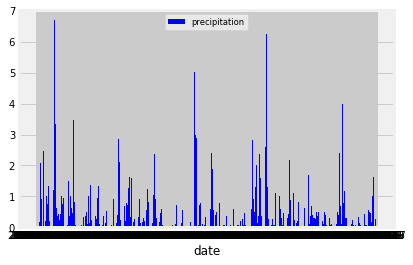

In [16]:
plt.bar(df1['Date'],df1['Precipitation'],color = 'blue',label = 'precipitation')
plt.legend(loc="upper center", fontsize="small")
plt.xlabel("date")
plt.show()

In [17]:
df1.describe()

,Precipitation,Temperature
count,2021.000000,2021.000000
mean,0.177279,74.494805
std,0.461190,4.628859
min,0.000000,58.000000
25%,0.000000,71.000000
50%,0.020000,75.000000
75%,0.130000,78.000000
max,6.700000,87.000000


# Exploratory Climate Analysis

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [20]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Measurement).group_by('station').count()
station_count 
#[(9)]

9

In [21]:
station_data = session.query(Station.name,Station.longitude, Station.latitude, Station.station, Station.elevation).all()
station_df = pd.DataFrame(station_data,columns=['name','longitude','latitude','station','elevation'])
station_df


,name,longitude,latitude,station,elevation
0,"WAIKIKI 717.2, HI US",-157.81680,21.27160,USC00519397,3.0
1,"KANEOHE 838.1, HI US",-157.80150,21.42340,USC00513117,14.6
2,"KUALOA RANCH HEADQUARTERS 886.9, HI US",-157.83740,21.52130,USC00514830,7.0
3,"PEARL CITY, HI US",-157.97510,21.39340,USC00517948,11.9
4,"UPPER WAHIAWA 874.3, HI US",-158.01110,21.49920,USC00518838,306.6
5,"WAIMANALO EXPERIMENTAL FARM, HI US",-157.71139,21.33556,USC00519523,19.5
6,"WAIHEE 837.5, HI US",-157.84889,21.45167,USC00519281,32.9
7,"HONOLULU OBSERVATORY 702.2, HI US",-157.99920,21.31520,USC00511918,0.9
8,"MANOA LYON ARBO 785.2, HI US",-157.80250,21.33310,USC00516128,152.4


In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
#station_df["station"].value_counts()
df1["Station"].value_counts()
# List the stations and the counts in descending order.

USC00519397    359
USC00519281    352
USC00513117    343
USC00516128    328
USC00519523    314
USC00514830    265
USC00517948     60
Name: Station, dtype: int64

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowest_temp = session.query(Measurement.tobs).\
filter_by(station='USC00519397').\
order_by(Measurement.tobs).first()
highest_temp = session.query(Measurement.station,Measurement.tobs).\
filter_by(station='USC00519397').\
order_by(Measurement.tobs.desc()).first()
avg_temp = session.query(func.avg(Measurement.tobs)).\
filter_by(station='USC00519397').all()

print(f"lowest temperature:{lowest_temp}; highest temperature:{highest_temp}, average temperation:{avg_temp}")

lowest temperature:(56.0,); highest temperature:('USC00519397', 87.0), average temperation:[(74.55323054331865,)]


In [24]:
max_temp = session.query(Measurement.tobs).\
order_by(Measurement.tobs.desc()).first()
max_temp
max_temp_stations= session.query(Measurement.station).\
filter_by(tobs=87).all()
max_temp_stations

[('USC00519397'), ('USC00519397'), ('USC00517948'), ('USC00511918')]

In [25]:
latest_date_397 = session.query(Measurement.date).\
filter_by(station = 'USC00519397').\
order_by(Measurement.date.desc()).first()
latest_date_948 = session.query(Measurement.date).\
filter_by(station = 'USC00517948').\
order_by(Measurement.date.desc()).first()
latest_date_918 = session.query(Measurement.date).\
filter_by(station = 'USC00511918').\
order_by(Measurement.date.desc()).first()
print(f"USC00519397 {latest_date_397},USC00517948{latest_date_948},USC00511918{latest_date_918}")

USC00519397 ('2017-08-23',),USC00517948('2017-07-31',),USC00511918('2015-10-30',)


In [26]:

year_ago_397 = dt.date(2017,8,23) - dt.timedelta(days=365)
year_ago_948 = dt.date(2017,7,31) - dt.timedelta(days=365)
year_ago_918 = dt.date(2015,10,30) - dt.timedelta(days=365)
year_ago_918

datetime.date(2014, 10, 30)

In [27]:
temp_397 = session.query(Measurement.date,Measurement.station,Measurement.tobs).\
filter_by(station='USC00519397').\
filter(Measurement.date<='2017-08-23').\
filter(Measurement.date>='2016-08-23').all()
df_397 = pd.DataFrame(temp_397,columns=["Date","Station","Temperature"])
temp_948 = session.query(Measurement.date,Measurement.station,Measurement.tobs).\
filter_by(station='USC00517948').\
filter(Measurement.date<='2017-07-31').\
filter(Measurement.date>='2016-07-31').all()
df_948 = pd.DataFrame(temp_397,columns=["Date","Station","Temperature"])
temp_918 = session.query(Measurement.date,Measurement.station,Measurement.tobs).\
filter_by(station='USC00511918').\
filter(Measurement.date<='2015-10-30').\
filter(Measurement.date>='2014-10-30').all()
df_918 = pd.DataFrame(temp_397,columns=["Date","Station","Temperature"])


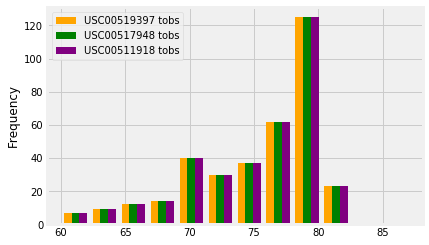

In [36]:
plt.hist([df_397['Temperature'],df_948['Temperature'],df_918['Temperature']], color=['orange','green','purple'],label=['USC00519397 tobs','USC00517948 tobs','USC00511918 tobs'], bins=12)
plt.ylabel("Frequency")
plt.legend(loc='best')
plt.show()

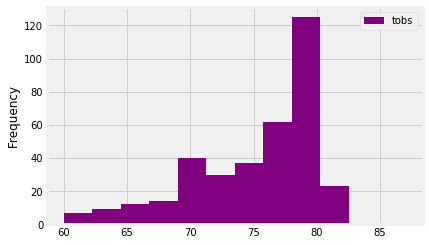

In [35]:
plt.hist(df_948['Temperature'], color='purple',label='tobs',bins = 12)
plt.ylabel("Frequency")
plt.legend(loc='best')
plt.show()

In [1]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [30]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [80]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_data = calc_temps('2014-02-14', '2014-02-21')
trip_data

[(64.0, 70.96491228070175, 77.0)]

In [42]:
trip_data[0][1]

70.96491228070175

In [56]:
trip_df=pd.DataFrame(trip_data, columns=['min_t','avg_t','max_t'])
trip_df

,min_t,avg_t,max_t
0,64.0,70.964912,77.0


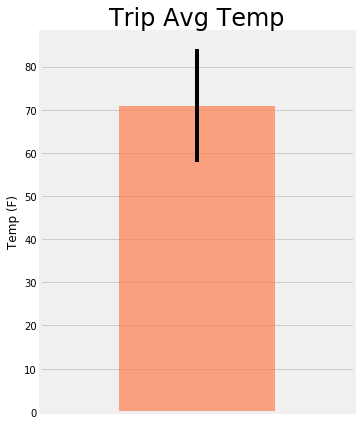

In [78]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trip_df['avg_t'].plot(kind='bar',yerr=trip_df['max_t']-trip_df['min_t'],figsize=(5,7), alpha=0.7, color='coral')
plt.title("Trip Avg Temp", fontsize=24)
plt.ylabel("Temp (F)")
plt.xticks([])
#plt.savefig("")
plt.show()

In [136]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rainfall_data=session.query(Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation).\
group_by(Measurement.station).\
filter(Measurement.station == Station.station).\
filter(Measurement.date<='2015-02-21').\
filter(Measurement.date>='2014-02-14').\
order_by(func.sum(Measurement.prcp).desc()).all()
rainfall_data

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [139]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
trip_start_date= 2019-3-5
trip_end_date = 2019-3-15
numdays=10

# Use the start and end date to create a range of dates
date_list=[]
date_list = [dt.date(2019,3,15) - dt.timedelta(days=numdays) for x in range(numdays)]
# Stip off the year and save a list of %m-%d strings
date_list
# Loop through the list of %m-%d strings and calculate the normals for each date


[datetime.date(2019, 3, 5),
 datetime.date(2019, 3, 5),
 datetime.date(2019, 3, 5),
 datetime.date(2019, 3, 5),
 datetime.date(2019, 3, 5),
 datetime.date(2019, 3, 5),
 datetime.date(2019, 3, 5),
 datetime.date(2019, 3, 5),
 datetime.date(2019, 3, 5),
 datetime.date(2019, 3, 5)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


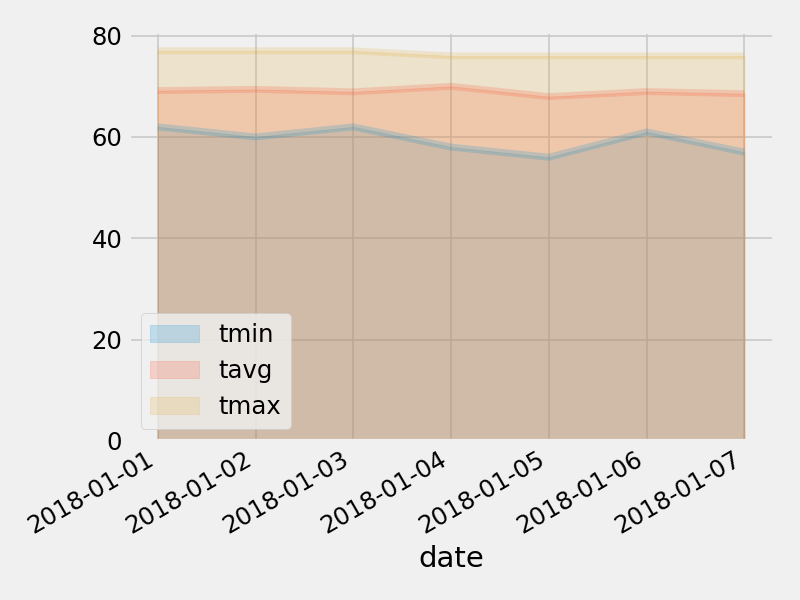

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
